# O objetivo do estudo é verificar o impacto do estágio na retenção dos alunos do curso de Ciência da Computação na UFRRJ

# Importa as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lê o arquivo

In [2]:
df = pd.read_csv('C:/Users/dirce/Downloads/Minha.csv', header = 1)

# Verifica quantas linhas e colunas possui

In [3]:
df

,Matrícula,Ingresso,Status,%Cumprido,Períodos Cursados,Reprovou TCC,Faz Estágio,Início,Carga Horária,Local,...,9,10,11,12,13,14,15,16,17,18
0,1,2010,Formado,"100,00",15,Sim,Não,NaN,NaN,NaN,...,2.0,2.0,3.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0
1,2,2010,Formado,"100,00",18,Sim,Não,NaN,NaN,NaN,...,0.0,0.0,4.0,5.0,3.0,3.0,2.0,1.0,1.0,0.0
2,3,2010,Formado,"100,00",12,Sim,Sim,9.0,20.0,UFRJ-Fundão,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2010,Formado,"100,00",15,Não,Sim,3.0,20.0,UFRJ-Fundão,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2010,Formado,"100,00",15,Sim,Sim,11.0,20.0,UFRJ-Fundão,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,2015,Ativo,"95,11",11,Sim,Sim,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,138,2015,Formado,"100,00",10,Sim,Sim,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,139,2015,Ativo,"79,08",11,Não,Sim,7.0,30.0,Centro-RJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,140,2015,Ativo,"88,04",11,Sim,Sim,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Separa entre os que fizeram e não fizeram Estágio

In [4]:
EstagioSim = df[(df["Faz Estágio"] == 'Sim')][["Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]
EstagioNao = df[(df["Faz Estágio"] == 'Não')][["Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]

# Verifica a média de reprovações dos dois grupos em cada matéria

In [5]:
EstagioSim.groupby(["Faz Estágio"]).mean()

,Matemática,Fundamentos da Computação,Tecnologia da Computação,Ciências Básicas,Social e Profissional,Laboratório,Tópicos Especiais,TCC 1,TCC 2
Faz Estágio,,,,,,,,,
Sim,2.053571,2.464286,1.758929,0.151786,0.026786,10.035714,0.544643,0.276786,1.401786


In [6]:
EstagioNao.groupby(["Faz Estágio"]).mean()

,Matemática,Fundamentos da Computação,Tecnologia da Computação,Ciências Básicas,Social e Profissional,Laboratório,Tópicos Especiais,TCC 1,TCC 2
Faz Estágio,,,,,,,,,
Não,1.833333,3.25,1.666667,0.333333,0.166667,11.833333,1.166667,0.666667,0.833333


# Faz um gráfico pra melhor visualizar

# Porém, por conta dos grandes nomes das matérias, faço a leitura de outro arquivo com as siglas dos nomes e depois coloco seu significado ao lado do gráfico

In [7]:
df = pd.read_csv('C:/Users/dirce/Downloads/Minha1.csv', header = 1)
EstagioSim = df[(df["Faz Estágio"] == 'Sim')][["Faz Estágio", "Carga Horária", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]
EstagioNao = df[(df["Faz Estágio"] == 'Não')][["Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]
dic = {'M': 'Matemática', 
       'F': 'Fundamentos da Computação', 
       'T': 'Tecnologia da Computação', 
       'CB': 'Ciências Básicas', 
       'SP': 'Social e Profissional', 
       'Lab': 'Laboratório', 
       'TE': 'Tópicos Especiais'}
tic = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

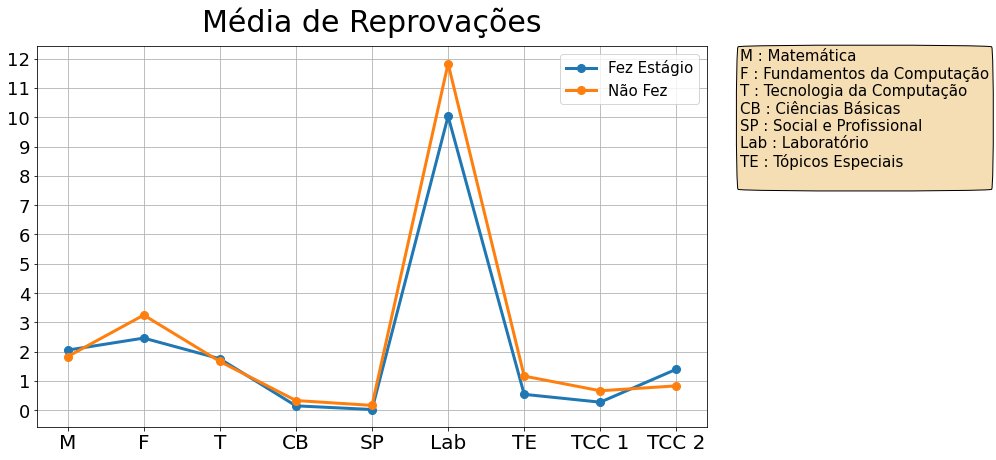

In [8]:
EstagioSim.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(14,8), fontsize=15, linewidth=3, marker='o', markersize=8)
ax = EstagioNao.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(12,7), fontsize=15, grid=True, linewidth=3, marker='o', markersize=8)
ax.set_title('Média de Reprovações', fontsize = 30, pad=15.0)
ax.legend(['Fez Estágio', 'Não Fez'], fontsize=15)
textdict = ""
for k, v in dic.items():
    textdict = textdict + "{k} : {v}\n".format(k=k,v=v)
ax.text(1.05,0.63, textdict, transform=ax.transAxes, verticalalignment='bottom', fontsize = 15, bbox={'boxstyle':'round4', 'facecolor': 'wheat'})
plt.yticks(tic, fontsize = 18)
plt.xticks(fontsize=20)

# Verifico o total de reprovações dos dois grupos pra saber se o estágio impactou de alguma forma

In [9]:
df = pd.read_csv('C:/Users/dirce/Downloads/Minha.csv', header = 1)
EstagioSim = df[(df["Faz Estágio"] == 'Sim')][["Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]
EstagioNao = df[(df["Faz Estágio"] == 'Não')][["Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]

In [10]:
EstagioSim["Total"] = EstagioSim.loc[: ,"Matemática"] + EstagioSim.loc[: ,"Fundamentos da Computação"] + EstagioSim.loc[: ,"Tecnologia da Computação"] + EstagioSim.loc[: ,"Ciências Básicas"] + EstagioSim.loc[: ,"Social e Profissional"] + EstagioSim.loc[: ,"Laboratório"] + EstagioSim.loc[: ,"Tópicos Especiais"] + EstagioSim.loc[: ,"TCC 1"] + EstagioSim.loc[: ,"TCC 2"]                   
EstagioNao["Total"] = EstagioNao.loc[: ,"Matemática"] + EstagioNao.loc[: ,"Fundamentos da Computação"] + EstagioNao.loc[: ,"Tecnologia da Computação"] + EstagioNao.loc[: ,"Ciências Básicas"] + EstagioNao.loc[: ,"Social e Profissional"] + EstagioNao.loc[: ,"Laboratório"] + EstagioNao.loc[: ,"Tópicos Especiais"] + EstagioNao.loc[: ,"TCC 1"] + EstagioNao.loc[: ,"TCC 2"]

In [11]:
EstagioSim["Total"].mean()

18.714285714285715

In [12]:
EstagioNao["Total"].mean()

21.75

# Mais um gráfico, claro

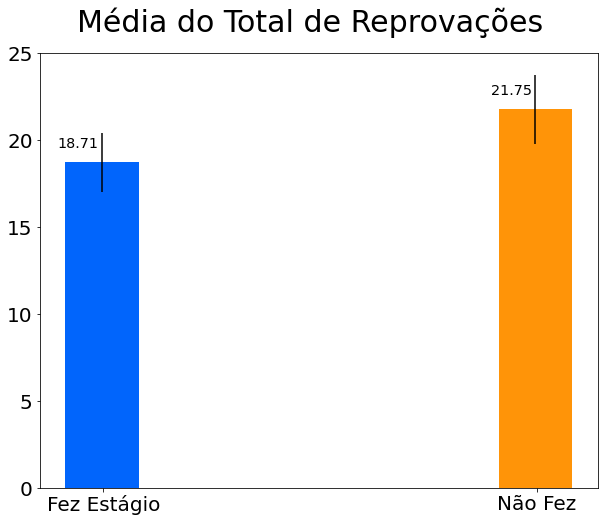

In [13]:
men_means, men_std = (18.71, 21.750000), (1.7, 2)

names = ['Fez Estágio','Não Fez']
y = [0, 5, 10, 15, 20, 25]

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/50, men_means, width, yerr=men_std,
                label='Men', color=[ '#0165fc' , '#ff9408'])



ax.set_xticks(ind)
ax.set_xticklabels(('Fez Estágio','Não Fez'), fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 12),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")

plt.suptitle('Média do Total de Reprovações', fontsize = 30, y=0.96)
plt.yticks(y, fontsize=20)

plt.show()

# Mas será que houve alteração na quantidade de reprovações no TCC entre os grupos?!

In [14]:
df.filter(items=['Faz Estágio', 'TCC 1', 'TCC 2']).groupby(['Faz Estágio']).mean()

,TCC 1,TCC 2
Faz Estágio,,
Não,0.666667,0.833333
Sim,0.276786,1.401786


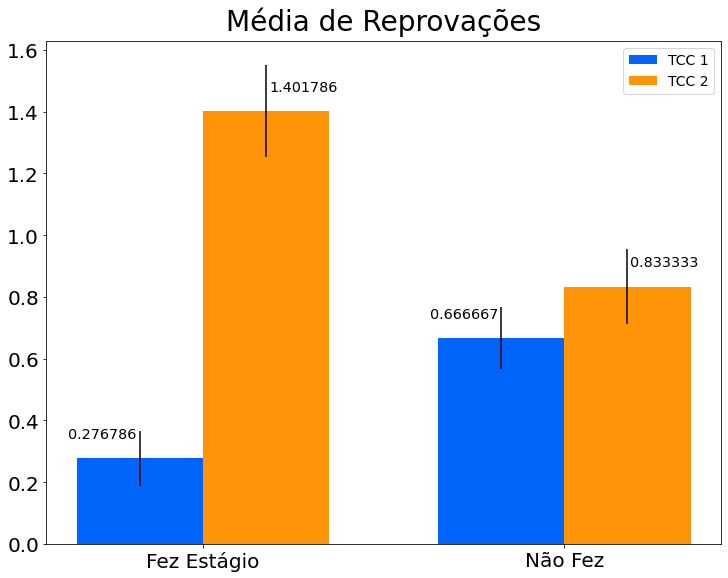

In [15]:
men_means, men_std = (0.276786, 0.666667), (0.09, 0.1)
women_means, women_std = (1.401786, 0.833333), (0.15, 0.12)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='TCC 1', color='#0165fc')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='TCC 2', color='#ff9408')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Média de Reprovações', fontsize=28, y=1.01)
ax.set_xticks(ind)
ax.set_xticklabels(('Fez Estágio', 'Não Fez'))
ax.legend(fontsize=14)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 17),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

# Porém quero saber se o estágio interferiu na retenção dos alunos, olhando a quantidade de períodos cursados pelos alunos que fizeram e não fizeram estágio

In [16]:
df.filter(items=['Faz Estágio', 'Períodos Cursados']).groupby(['Faz Estágio']).mean()

,Períodos Cursados
Faz Estágio,
Não,12.916667
Sim,12.607143


# Vamos visualizar isso melhor

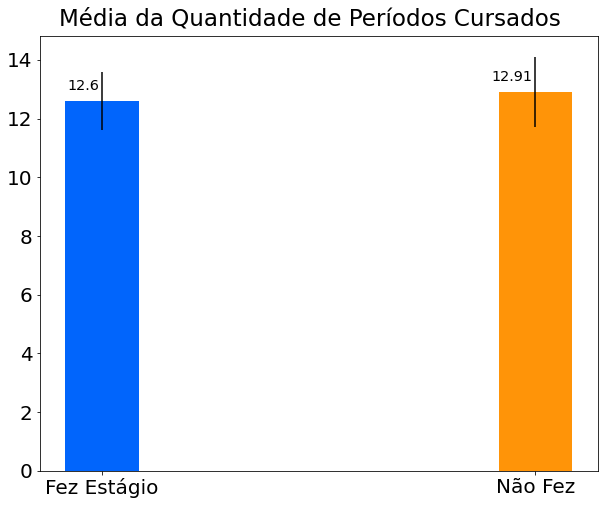

In [17]:
men_means, men_std = (12.60, 12.91), (1, 1.2)

names = ['Fez Estágio','Não Fez']

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind, men_means, width, yerr=men_std,
                label='Men', color=['#0165fc' , '#ff9408'])


ax.set_xticks(ind)
ax.set_xticklabels(('Fez Estágio','Não Fez'), fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 8),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")

plt.suptitle('Média da Quantidade de Períodos Cursados', fontsize = 23, y=0.93)
plt.yticks(fontsize=20)

plt.show()

# Se notarmos, os alunos que fizeram estágio tinham duas carga horárias que mais apareciam, que eram 20 e 30 horas semanais

In [18]:
df['Carga Horária'].value_counts()

30.0    26
20.0    23
25.0     2
40.0     1
Name: Carga Horária, dtype: int64

# Agora vamos começar a procurar as diferenças entre esses dois grupos, dos que tiveram menos e mais horas de estagio durante suas semanas

In [19]:
EstagioSim20 = df[((df["Faz Estágio"] == 'Sim') & (df["Carga Horária"] == 20) & (df["Status"] == 'Formado'))][["Status", "Faz Estágio", "Reprovou TCC", "Carga Horária", "Períodos Cursados", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]
EstagioSim30 = df[((df["Faz Estágio"] == 'Sim') & (df["Carga Horária"] == 30) & (df["Status"] == 'Formado'))][["Status", "Faz Estágio", "Reprovou TCC", "Carga Horária", "Períodos Cursados", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]

In [20]:
EstagioSim20.groupby(["Faz Estágio", "Carga Horária", "Status"]).mean()

,,,Períodos Cursados,Matemática,Fundamentos da Computação,Tecnologia da Computação,Ciências Básicas,Social e Profissional,Laboratório,Tópicos Especiais,TCC 1,TCC 2
Faz Estágio,Carga Horária,Status,,,,,,,,,,
Sim,20.0,Formado,11.833333,1.555556,1.555556,0.833333,0.222222,0.0,4.277778,0.055556,0.222222,0.722222


In [21]:
EstagioSim30.groupby(["Faz Estágio", "Carga Horária", "Status"]).mean()

,,,Períodos Cursados,Matemática,Fundamentos da Computação,Tecnologia da Computação,Ciências Básicas,Social e Profissional,Laboratório,Tópicos Especiais,TCC 1,TCC 2
Faz Estágio,Carga Horária,Status,,,,,,,,,,
Sim,30.0,Formado,13.6,2.0,2.4,2.2,0.4,0.0,12.0,0.4,0.0,2.2


# Com gráfico visualizamos melhor

In [22]:
df = pd.read_csv('C:/Users/dirce/Downloads/Minha1.csv', header = 1)
EstagioSim20 = df[((df["Faz Estágio"] == 'Sim') & (df["Carga Horária"] == 20))][["Status", "Faz Estágio", "Carga Horária", "Períodos Cursados", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]
EstagioSim30 = df[((df["Faz Estágio"] == 'Sim') & (df["Carga Horária"] == 30))][["Status", "Faz Estágio", "Carga Horária", "Períodos Cursados", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

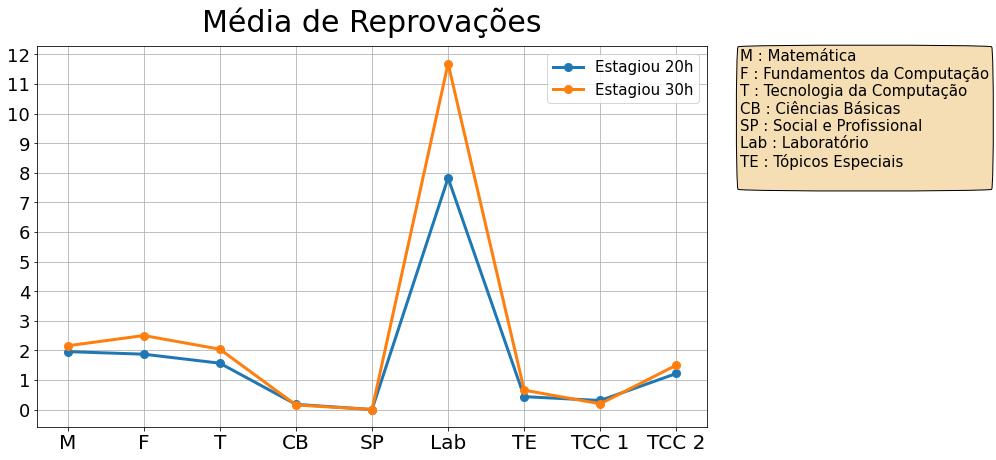

In [23]:
EstagioSim20.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(14,8), fontsize=15, linewidth=3, marker='o', markersize=8)
ax = EstagioSim30.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(12,7), fontsize=15, grid=True, linewidth=3, marker='o', markersize=8)
ax.set_title('Média de Reprovações', fontsize = 30, pad=15.0)
ax.legend(['Estagiou 20h', 'Estagiou 30h'], fontsize=15)
textdict = ""
for k, v in dic.items():
    textdict = textdict + "{k} : {v}\n".format(k=k,v=v)
ax.text(1.05,0.63, textdict, transform=ax.transAxes, verticalalignment='bottom', fontsize = 15, bbox={'boxstyle':'round4', 'facecolor': 'wheat'})
plt.yticks(tic, fontsize = 18)
plt.xticks(fontsize=20)

# Será que o total de reprovações por carga horária também tem diferença?!

In [24]:
df = pd.read_csv('C:/Users/dirce/Downloads/Minha.csv', header = 1)
EstagioSim = df[(df["Faz Estágio"] == 'Sim')][["Carga Horária", "Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]
EstagioSim["Total"] = EstagioSim.loc[: ,"Matemática"] + EstagioSim.loc[: ,"Fundamentos da Computação"] + EstagioSim.loc[: ,"Tecnologia da Computação"] + EstagioSim.loc[: ,"Ciências Básicas"] + EstagioSim.loc[: ,"Social e Profissional"] + EstagioSim.loc[: ,"Laboratório"] + EstagioSim.loc[: ,"Tópicos Especiais"] + EstagioSim.loc[: ,"TCC 1"] + EstagioSim.loc[: ,"TCC 2"]

In [25]:
EstagioSim.filter(items=['Faz Estágio', 'Carga Horária', 'Total']).groupby(['Faz Estágio', 'Carga Horária']).mean()

Total
Faz Estágio Carga Horária           
Sim         20.0           15.347826
            25.0           54.000000
            30.0           20.884615
            40.0           10.000000

# Qual a melhor forma de visualizar isso?!

# Pela quantidade tão pequena de alunos com 25 e 40 horas de carga horária semanal, utilizei só a informação de 20 e 30 horas semanais

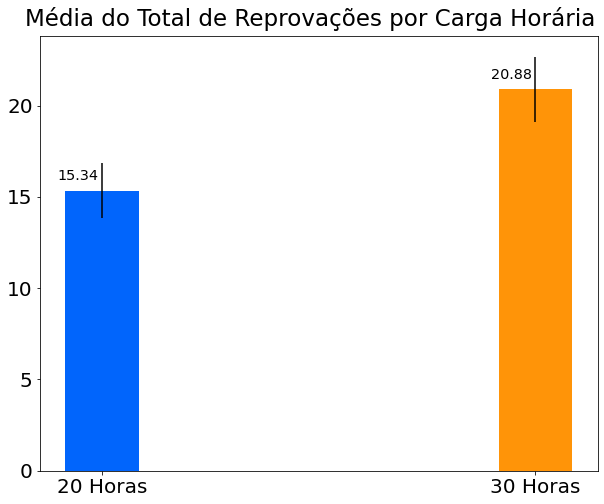

In [26]:
men_means, men_std = (15.34, 20.88), (1.5, 1.8)

names = ['20 Horas','30 Horas']

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind, men_means, width, yerr=men_std,
                label='Men', color=['#0165fc' , '#ff9408'])

ax.set_xticks(ind)
ax.set_xticklabels(names, fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 8),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")

plt.suptitle('Média do Total de Reprovações por Carga Horária', fontsize = 23, y=0.93)
plt.yticks(fontsize=20)

plt.show()

# Qual a influência da carga horária nas reprovações em TCC entre os dois grupos?!

In [27]:
EstagioSim.filter(items=['Faz Estágio', 'Carga Horária', 'TCC 1', 'TCC 2']).groupby(['Faz Estágio', 'Carga Horária']).mean()

TCC 1     TCC 2
Faz Estágio Carga Horária                    
Sim         20.0           0.304348  1.217391
            25.0           0.000000  1.000000
            30.0           0.192308  1.500000
            40.0           0.000000  0.000000

# Novamente vemos a irrelevancia dos valores na carga horária de 25 e 40 horas

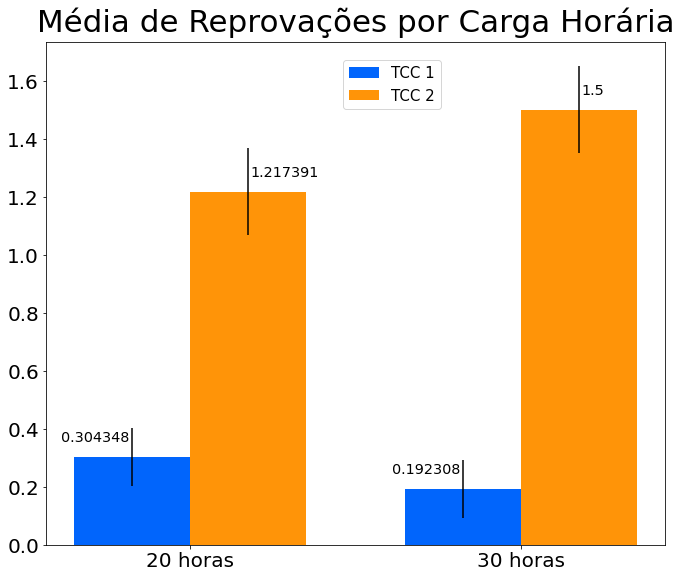

In [28]:
tcc1, tcc1_std = (0.304348, 0.192308), (0.1, 0.1)
tcc2, tcc2_std = (1.217391, 1.500000), (0.15, 0.15)

ind = np.arange(len(tcc1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/2, tcc1, width, yerr=tcc1_std,
                label='TCC 1', color='#0165fc')
rects2 = ax.bar(ind + width/2, tcc2, width, yerr=tcc2_std,
                label='TCC 2', color='#ff9408')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Média de Reprovações por Carga Horária', fontsize=31, y=1.01)
ax.set_xticks(ind)
ax.set_xticklabels(('20 horas', '30 horas'))
ax.legend(fontsize=15, loc='upper right', bbox_to_anchor=(0.65, 0.98))


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 12),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

# Tudo feito até agora utilizou os dados de alunos que se formaram e também que estão ativos, então podem sofrer alguma alteração ao longo de sua vida acadêmica, então decidi fazer as mesmas perguntas para os dados dos alunos que já se formaram

In [29]:
EstagioSim = df[(df["Faz Estágio"] == 'Sim') & (df["Status"]=='Formado')][["Carga Horária", "Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]
EstagioNao = df[(df["Faz Estágio"] == 'Não') & (df["Status"]=='Formado')][["Carga Horária", "Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]]

In [30]:
EstagioSim.groupby(["Faz Estágio", 'Status']).mean()

,,Carga Horária,Matemática,Fundamentos da Computação,Tecnologia da Computação,Ciências Básicas,Social e Profissional,Laboratório,Tópicos Especiais,TCC 1,TCC 2
Faz Estágio,Status,,,,,,,,,,
Sim,Formado,22.173913,1.614035,1.54386,0.982456,0.210526,0.017544,5.701754,0.192982,0.245614,1.22807


In [31]:
EstagioNao.groupby(["Faz Estágio", 'Status']).mean()

,,Carga Horária,Matemática,Fundamentos da Computação,Tecnologia da Computação,Ciências Básicas,Social e Profissional,Laboratório,Tópicos Especiais,TCC 1,TCC 2
Faz Estágio,Status,,,,,,,,,,
Não,Formado,NaN,1.3,1.7,0.5,0.2,0.2,8.4,0.6,0.6,0.9


# Como sempre, código e gráfico

In [32]:
df = pd.read_csv('C:/Users/dirce/Downloads/Minha1.csv', header = 1)
EstagioSim = df[(df["Faz Estágio"] == 'Sim') & (df["Status"]=='Formado')][["Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]
EstagioNao = df[(df["Faz Estágio"] == 'Não') & (df["Status"]=='Formado')][["Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

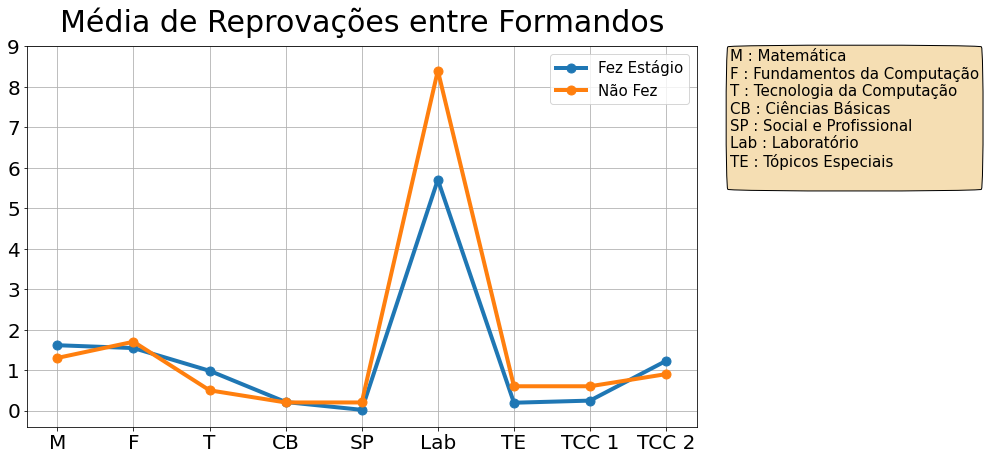

In [33]:
tic = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
EstagioSim.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(14,8), fontsize=15, linewidth=4, marker='o', markersize=9)
ax = EstagioNao.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(12,7), fontsize=15, grid=True, linewidth=4, marker='o', markersize=9)
ax.set_title('Média de Reprovações entre Formandos', fontsize = 30, pad=15.0)
ax.legend(['Fez Estágio', 'Não Fez'], fontsize=15)
textdict = ""
for k, v in dic.items():
    textdict = textdict + "{k} : {v}\n".format(k=k,v=v)
ax.text(1.05,0.63, textdict, transform=ax.transAxes, verticalalignment='bottom', fontsize = 15, bbox={'boxstyle':'round4', 'facecolor': 'wheat'})
plt.yticks(tic, fontsize = 20)
plt.xticks(fontsize=20)

# Agora queremos saber o total de reprovações

In [34]:
EstagioSim["Total"] = EstagioSim.loc[: ,"M"] + EstagioSim.loc[: ,"F"] + EstagioSim.loc[: ,"T"] + EstagioSim.loc[: ,"CB"] + EstagioSim.loc[: ,"SP"] + EstagioSim.loc[: ,"Lab"] + EstagioSim.loc[: ,"TE"] + EstagioSim.loc[: ,"TCC 1"] + EstagioSim.loc[: ,"TCC 2"]
EstagioNao["Total"] = EstagioNao.loc[: ,"M"] + EstagioNao.loc[: ,"F"] + EstagioNao.loc[: ,"T"] + EstagioNao.loc[: ,"CB"] + EstagioNao.loc[: ,"SP"] + EstagioNao.loc[: ,"Lab"] + EstagioNao.loc[: ,"TE"] + EstagioNao.loc[: ,"TCC 1"] + EstagioNao.loc[: ,"TCC 2"]

In [35]:
EstagioSim["Total"].mean()

11.736842105263158

In [36]:
EstagioNao["Total"].mean()

14.4

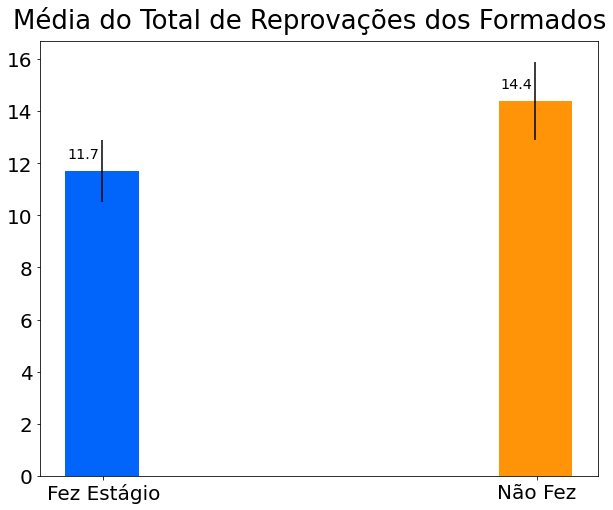

In [37]:
men_means, men_std = (11.7, 14.4), (1.2, 1.5)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/50, men_means, width, yerr=men_std,
                label='Men', color=[ '#0165fc' , '#ff9408'])

ax.set_xticks(ind)
ax.set_xticklabels(('Fez Estágio','Não Fez'), fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 10),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')

autolabel(rects1, "left")

plt.suptitle('Média do Total de Reprovações dos Formados', fontsize = 26, y=0.94)
plt.yticks(fontsize=20)

plt.show()

# Como os alunos que fizeram e não fizeram estágio, e se formaram, se saíram no TCC?!

In [38]:
df.filter(items=['Status', 'Faz Estágio', 'TCC 1', 'TCC 2']).where(df['Status']=='Formado').groupby(['Status', 'Faz Estágio']).mean()

TCC 1    TCC 2
Status  Faz Estágio                   
Formado Não          0.600000  0.90000
        Sim          0.245614  1.22807

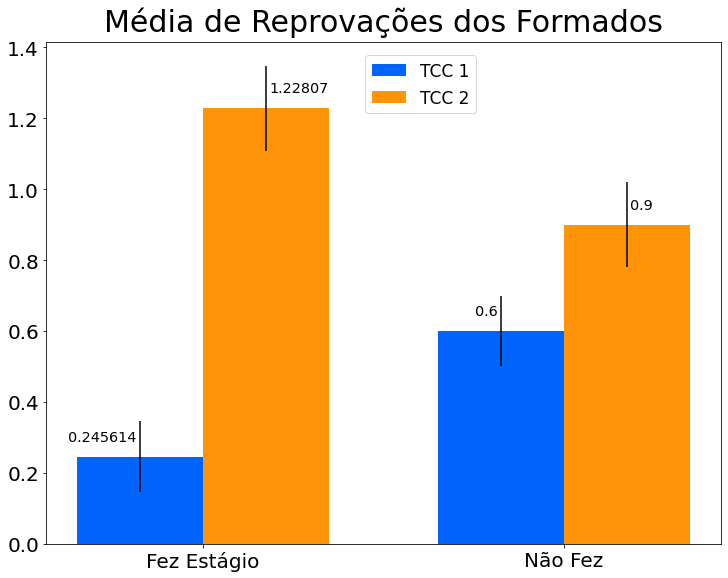

In [39]:
men_means, men_std = (0.245614, 0.600000), (0.10, 0.10)
women_means, women_std = (1.22807, 0.90000), (0.12, 0.12)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='TCC 1', color='#0165fc')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='TCC 2', color='#ff9408')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Média de Reprovações dos Formados', fontsize=30, y=1.01)
ax.set_xticks(ind)
ax.set_xticklabels(('Fez Estágio', 'Não Fez'))
ax.legend(fontsize=14)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 13),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.legend(fontsize=17, loc='upper right', bbox_to_anchor=(0.65, 0.99))

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

# Quantos períodos foram necessários para a conclusão do curso?!

In [40]:
df.filter(items=['Status', 'Faz Estágio', 'Períodos Cursados']).where(df['Status']=='Formado').groupby(['Status', 'Faz Estágio']).mean()

Períodos Cursados
Status  Faz Estágio                   
Formado Não                  12.300000
        Sim                  11.929825

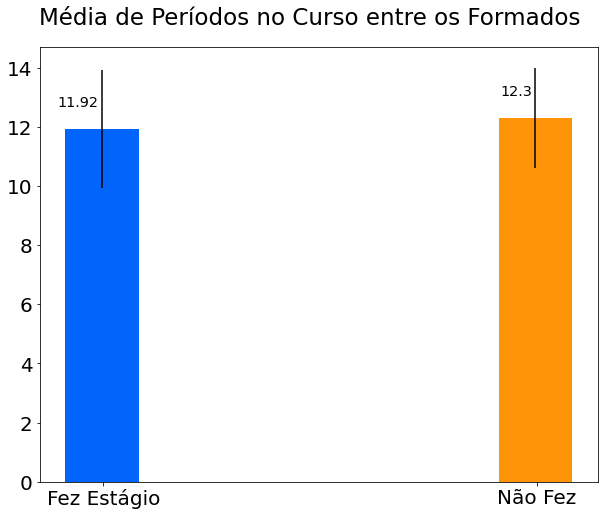

In [41]:
men_means, men_std = (11.92, 12.30), (2, 1.7)

names = ['Fez Estágio','Não Fez']


ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/50, men_means, width, yerr=men_std,
                label='Men', color=[ '#0165fc' , '#ff9408'])



ax.set_xticks(ind)
ax.set_xticklabels(names, fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 20),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")

plt.suptitle('Média de Períodos no Curso entre os Formados', fontsize = 23, y=0.95)
plt.yticks(fontsize=20)

plt.show()

# Entre os formados que fizeram estágio, vou separar pela carga horária. Primeiro olhando a média de reprovações em cada matéria

In [42]:
Estagio20 = df[(df["Faz Estágio"] == 'Sim') & (df["Status"]=='Formado') & (df["Carga Horária"]==20)][["Períodos Cursados", "Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]
Estagio30 = df[(df["Faz Estágio"] == 'Sim') & (df["Status"]=='Formado') & (df["Carga Horária"]==30)][["Períodos Cursados", "Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]

In [44]:
Estagio20.groupby(["Faz Estágio", 'Status']).mean()

,,Períodos Cursados,M,F,T,CB,SP,Lab,TE,TCC 1,TCC 2
Faz Estágio,Status,,,,,,,,,,
Sim,Formado,11.833333,1.555556,1.555556,0.833333,0.222222,0.0,4.277778,0.055556,0.222222,0.722222


In [43]:
Estagio30.groupby(["Faz Estágio", 'Status']).mean()

,,Períodos Cursados,M,F,T,CB,SP,Lab,TE,TCC 1,TCC 2
Faz Estágio,Status,,,,,,,,,,
Sim,Formado,13.6,2.0,2.4,2.2,0.4,0.0,12.0,0.4,0.0,2.2


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

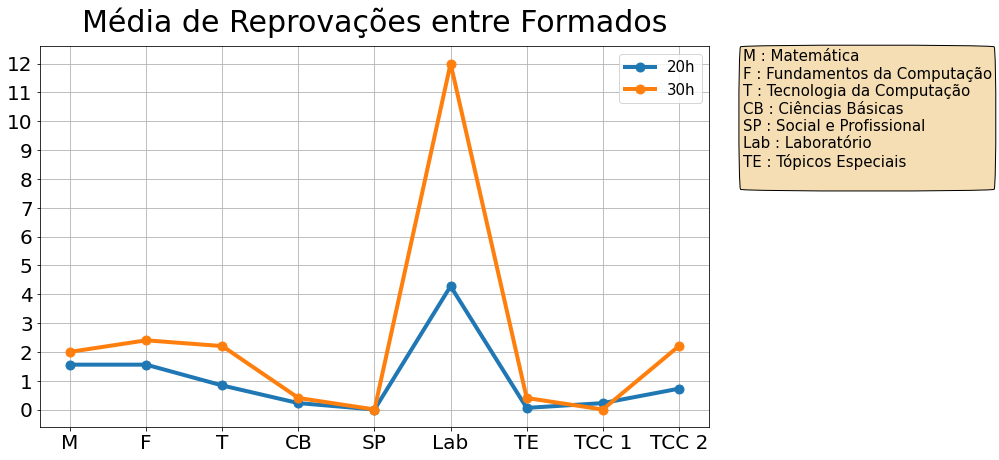

In [45]:
tic = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Estagio20.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(14,8), fontsize=15, linewidth=4, marker='o', markersize=9)
ax = Estagio30.filter(items=["M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]).mean().plot(figsize=(12,7), fontsize=15, grid=True, linewidth=4, marker='o', markersize=9)
ax.set_title('Média de Reprovações entre Formados', fontsize = 30, pad=15.0)
ax.legend(['20h', '30h'], fontsize=15)
textdict = ""
for k, v in dic.items():
    textdict = textdict + "{k} : {v}\n".format(k=k,v=v)
ax.text(1.05,0.63, textdict, transform=ax.transAxes, verticalalignment='bottom', fontsize = 15, bbox={'boxstyle':'round4', 'facecolor': 'wheat'})
plt.yticks(tic, fontsize = 20)
plt.xticks(fontsize=20)

# Depois vendo se há diferença no total de reprovações pra cada carga horária

In [46]:
EstagioSim = df[(df["Faz Estágio"] == 'Sim') & (df["Status"]=='Formado') & ((df["Carga Horária"]==20) | (df["Carga Horária"]==30))][["Carga Horária", "Períodos Cursados", "Status", "%Cumprido", "Reprovou TCC", "Faz Estágio", "Local", "M", "F", "T", "CB", "SP", "Lab", "TE", "TCC 1", "TCC 2"]]
EstagioSim["Total"] = EstagioSim.loc[: ,"M"] + EstagioSim.loc[: ,"F"] + EstagioSim.loc[: ,"T"] + EstagioSim.loc[: ,"CB"] + EstagioSim.loc[: ,"SP"] + EstagioSim.loc[: ,"Lab"] + EstagioSim.loc[: ,"TE"] + EstagioSim.loc[: ,"TCC 1"] + EstagioSim.loc[: ,"TCC 2"]

In [47]:
EstagioSim.filter(items=['Status', 'Carga Horária', 'Faz Estágio', 'Total']).where(EstagioSim['Status']=='Formado').groupby(['Status', 'Faz Estágio', 'Carga Horária']).mean()

Total
Status  Faz Estágio Carga Horária           
Formado Sim         20.0            9.444444
                    30.0           21.600000

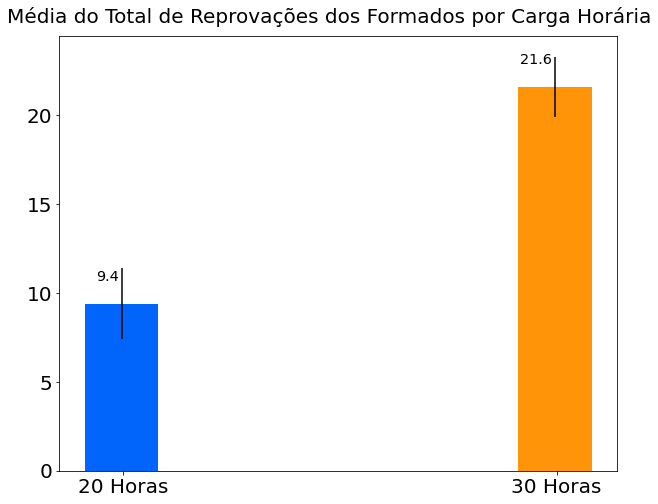

In [48]:
men_means, men_std = (9.4, 21.6), (2, 1.7)

names = ['20 Horas','30 Horas']


ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/50, men_means, width, yerr=men_std,
                label='Men', color=[ '#0165fc' , '#ff9408'])



ax.set_xticks(ind)
ax.set_xticklabels(names, fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 20),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")

plt.suptitle('Média do Total de Reprovações dos Formados por Carga Horária', fontsize = 20, y=0.93)
plt.yticks(fontsize=20)

plt.show()

# Procuramos também se há diferença entre os grupos no TCC

In [49]:
EstagioSim.filter(items=['Status', 'Carga Horária', 'Faz Estágio', 'TCC 1', 'TCC 2']).where(EstagioSim['Status']=='Formado').groupby(['Status', 'Faz Estágio', 'Carga Horária']).mean()

TCC 1     TCC 2
Status  Faz Estágio Carga Horária                    
Formado Sim         20.0           0.222222  0.722222
                    30.0           0.000000  2.200000

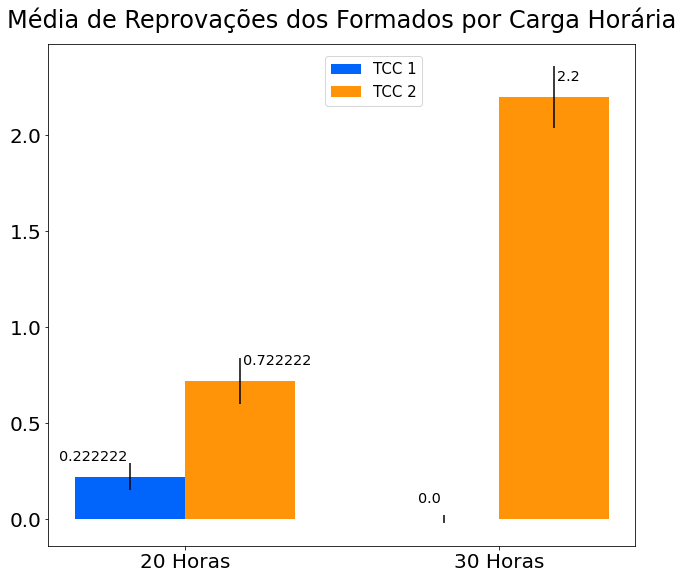

In [50]:
men_means, men_std = (0.222222, 0.000000), (0.07, 0.02)
women_means, women_std = (0.722222, 2.200000), (0.12, 0.16)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='TCC 1', color='#0165fc')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='TCC 2', color='#ff9408')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Média de Reprovações dos Formados por Carga Horária', fontsize=24, y=1.02)
ax.set_xticks(ind)
ax.set_xticklabels(('20 Horas', '30 Horas'))
ax.legend(fontsize=14)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 13),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.legend(fontsize=15, loc='upper right', bbox_to_anchor=(0.65, 0.99))

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

# Agora será que houve também diferença na quantidade de períodos cursados?!

In [51]:
EstagioSim.filter(items=['Status', 'Carga Horária', 'Faz Estágio', 'Períodos Cursados']).where(EstagioSim['Status']=='Formado').groupby(['Status', 'Faz Estágio', 'Carga Horária']).mean()

Períodos Cursados
Status  Faz Estágio Carga Horária                   
Formado Sim         20.0                   11.833333
                    30.0                   13.600000

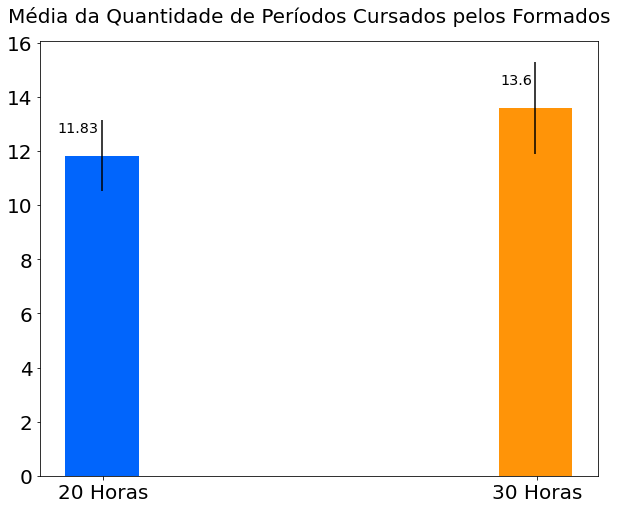

In [52]:
men_means, men_std = (11.83, 13.600000), (1.3, 1.7)

names = ['20 Horas','30 Horas']


ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/50, men_means, width, yerr=men_std,
                label='Men', color=[ '#0165fc' , '#ff9408'])



ax.set_xticks(ind)
ax.set_xticklabels(names, fontsize=20)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 20),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', size='x-large', weight='medium')


autolabel(rects1, "left")

plt.suptitle('Média da Quantidade de Períodos Cursados pelos Formados', fontsize = 20, y=0.94)
plt.yticks(fontsize=20)

plt.show()

# E mais alguns gráficos extras surgidos durante o processo, e que podem auxiliar de alguma forma as buscas pelo impacto do estágio na vida acamica dos alunos da UFRRJ

In [53]:
df = pd.read_csv('C:/Users/dirce/Downloads/Minha.csv', header = 1)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text major ticklabel objects>)

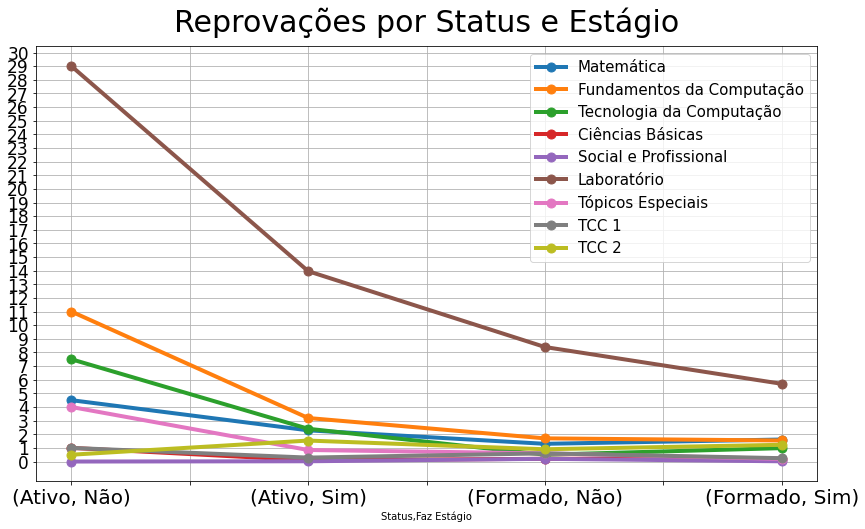

In [54]:
y = list(range(0,31))
ax = df.filter(items=['Status', 'Faz Estágio', "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]).where(df['Status'] != 'Trancado').groupby(['Status', 'Faz Estágio']).mean().plot(figsize=(14,8), fontsize=15, linewidth=4, grid=True, marker='o', markersize=9)
ax.set_title('Reprovações por Status e Estágio', fontsize = 30, pad=15.0)
ax.legend(fontsize=15)
plt.yticks(y, fontsize = 17)
plt.xticks(fontsize=20)

([<matplotlib.axis.YTick at 0x25f5e073a60>,
 <a list of 32 Text major ticklabel objects>)

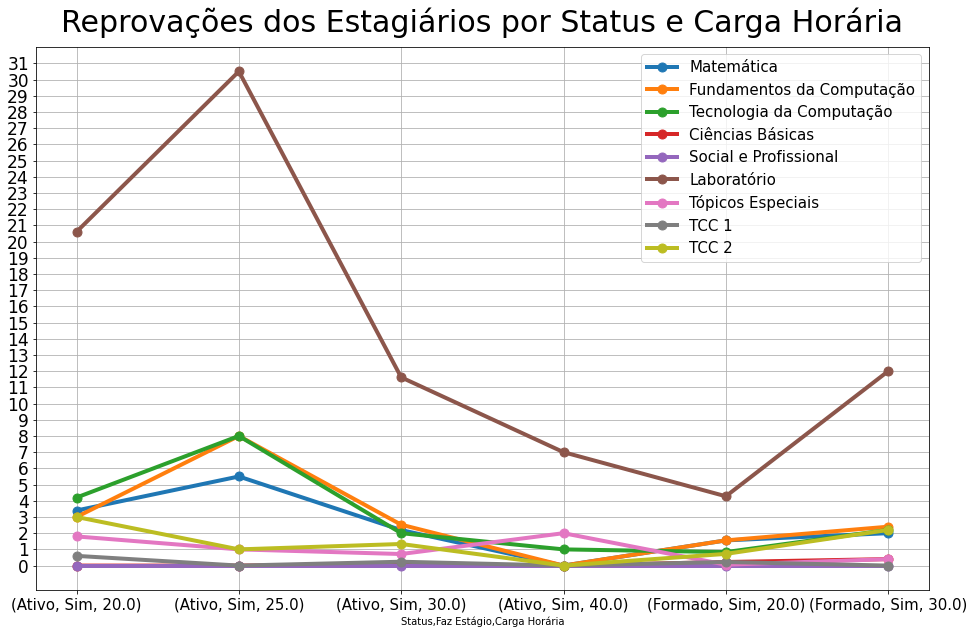

In [55]:
y = list(range(0,32))
ax = df.filter(items=['Status', 'Faz Estágio', "Carga Horária", "Matemática", "Fundamentos da Computação", "Tecnologia da Computação", "Ciências Básicas", "Social e Profissional", "Laboratório", "Tópicos Especiais", "TCC 1", "TCC 2"]).where(df['Status'] != 'Trancado').groupby(['Status', 'Faz Estágio', "Carga Horária"]).mean().plot(figsize=(16,10), fontsize=15, linewidth=4, marker='o', markersize=9, grid=True)
ax.set_title('Reprovações dos Estagiários por Status e Carga Horária', fontsize = 30, pad=15.0)
ax.legend(fontsize=15)
plt.yticks(y, fontsize = 17)

In [ ]:
81